----
# April_1_2020_Exchange Rate
----
* Name: Jikhan Jeong
----
* Data: Foreign_Exchange_Rates.xlsx from Kaggle (https://www.kaggle.com/brunotly/foreign-exchange-rates-per-dollar-20002019) 
* " (Data description in Kaggle) This datasets were generated on the Federal Reserve's Download Data Program. Some changes were made in the dataset, 
such as header simplifications and inversions of base currency.
For example, Fed provides Australian Dollar, Euro, New Zeland Dollar and United Kingdom Pound based in their units (not in dollar).
So I made a convertion for this dataset in order to view all rates based in dollar units."
* Program: Using stata for checking concepts of Times Series
* Ref: https://www.princeton.edu/~otorres/TS101.pdf
----

### Reducing load by selecting two variables
* Australian Dollar/US Dollar
* **Euro/US Dollar** : eur_per_usd 
* Japanese Yen/US Dollar 
* **UK Pound/US Dollar** : gbp_per_usd
* CAD/USD (= OANDA.com: https://www1.oanda.com/fx-for-business/historical-rates or WRDS)
---

* 1. Univariate ARIMA, GARCH, Kalman Filter model on each of the four time-series
* 2. A VAR model on the four time-series and test the existence of Granger Causality among them
* 3. A multivariate GARCH (please refer to the paper posted on the course website) model to study the relations between the volatilities and co-volatilities of the four exchange rates

---
AUSTRALIA - AUSTRALIAN DOLLAR/US$	EURO AREA - EURO/US$	NEW ZEALAND - NEW ZELAND DOLLAR/US$	UNITED KINGDOM - UNITED KINGDOM POUND/US$	BRAZIL - REAL/US$	CANADA - CANADIAN DOLLAR/US$	
CHINA - YUAN/US$	HONG KONG - HONG KONG DOLLAR/US$	INDIA - INDIAN RUPEE/US$	KOREA - WON/US$	MEXICO - MEXICAN PESO/US$	SOUTH AFRICA - RAND/US$	SINGAPORE - SINGAPORE DOLLAR/US$	
DENMARK - DANISH KRONE/US$	JAPAN - YEN/US$	MALAYSIA - RINGGIT/US$	NORWAY - NORWEGIAN KRONE/US$	SWEDEN
- KRONA/US$	SRI LANKA - SRI LANKAN RUPEE/US$	SWITZERLAND - FRANC/US$	TAIWAN - NEW TAIWAN DOLLAR/US$	THAILAND - BAHT/US$
---

* Data time :20000103 -- 20191231
* Change time period from 2009 to 2020 due to financial crisis in 2008
* CIA : factbook: https://www.cia.gov/library/publications/resources/the-world-factbook/geos/um.html
---

#### world import ranking: https://www.cia.gov/library/publications/resources/the-world-factbook/fields/rawdata_242.txt
---
* 1       United States                                       $2,361,000,000,000        2017 est   

* 2       China                                               $2,140,000,000,000        2018 

* 3       Germany                                             $1,135,000,000,000        2017 est   

* 4       Japan                                                 $644,700,000,000        2017 est   

* 5       United Kingdom                                        $615,900,000,000        2017 est  

* 6       Hong Kong                                             $602,400,000,000        2018    

* 7       France                                                $601,700,000,000        2017 est   

* 8       Curacao                                               $540,300,000,000        2018 est   

* 9       Korea, South                                          $457,500,000,000        2017 est  

* 10      Netherlands                                           $453,800,000,000        2017 est  

---
#### world export ranking: https://www.cia.gov/library/publications/resources/the-world-factbook/fields/rawdata_239.txt
---
* Exports compares the total US dollar amount of merchandise exports on an f.o.b. (free on board) basis. These figures are calculated on an exchange rate basis.
* 1       China                                               $2,490,000,000,000        2018  

* 2       United States                                       $1,553,000,000,000        2017 est 

* 3       Germany                                             $1,434,000,000,000        2017 est 

* 4       Japan                                                 $688,900,000,000        2017 est 

* 5       Korea, South                                          $577,400,000,000        2017 est  

* 6       Netherlands                                           $555,600,000,000        2017 est

* 7       France                                                $549,900,000,000        2017 est 

* 8       Hong Kong                                             $530,600,000,000        2018  

* 9       Italy                                                 $496,300,000,000        2017 est 

* 10      United Kingdom                                        $441,200,000,000        2017 est

---
#### usa export partner: https://www.cia.gov/library/publications/resources/the-world-factbook/fields/241.html#US
---
* This entry provides a rank ordering of trading partners starting with the most important; it sometimes includes the percent of total dollar value.
* Canada 18.3%, Mexico 15.7%, China 8.4%, Japan 4.4% (2017)
---
#### use import partner: htmtps://www.cia.gov/library/publications/resources/the-world-factbook/fields/403.html#US
---
* This entry provides a rank ordering of trading partners starting with the most important; it sometimes includes the percent of total dollar value.
* China 21.6%, Mexico 13.4%, Canada 12.8%, Japan 5.8%, Germany 5% (2017)

In [7]:
# The Fed
* https://www.federalreserve.gov/releases/h10/hist/default.htm

Unknown #command


---
#### Excahnge rate of top 5 import and export in the world
#### Exchange rate of top 5 import and export in US
---

* China : Yuan
* Canada : Dollar
* Germany, France: Euro
* Japan : Yen
* Korea : Won
* Mexico : Peso
* United Kingdom : Pound
* I made a convertion for this dataset in order to view all rates based in dollar units. (for the case of usd and euro)
* Data Package Link: https://www.federalreserve.gov/datadownload/Choose.aspx?rel=H10
---
* Rates in currency units per U.S. dollar except as noted by an asterisk
---

In [27]:
use "apr_10_20_exchange_rate.dta", clear

In [28]:
list in 1/5


     +---------------------------------------------------------------------------------------------------------------------+
     | index       time   eur_pe~d   gbp_pe~d   cad_pe~d   yuan_p~d   yen_pe~d   won_pe~d   pesos_~d   usd_pe~r   usd_pe~p |
     |---------------------------------------------------------------------------------------------------------------------|
  1. |     1   1/2/2009    .717052    .688705     1.2101     6.8225      91.12     1318.3    13.7815     1.3946      1.452 |
  2. |     2   1/5/2009    .736594    .684838      1.192       6.83       93.2     1313.5    13.5225     1.3576     1.4602 |
  3. |     3   1/6/2009    .743771    .676727     1.1822      6.836       94.2       1307      13.33     1.3445     1.4777 |
  4. |     4   1/7/2009    .728969    .655566      1.185      6.833       92.7     1292.3    13.3955     1.3718     1.5254 |
  5. |     5   1/8/2009    .729182    .658328      1.189     6.8342      91.15    1328.25     13.495     1.3714      1.519 |

In [29]:
ds

index         time          eur_per_usd   gbp_per_usd   cad_per_usd   yuan_per_usd  yen_per_usd   won_per_usd   pesos_per_~d  usd_per_eur   usd_per_gbp


In [30]:
sum


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
       index |      2,817        1409    813.3422          1       2817
        time |          0
 eur_per_usd |      2,817    .8121528    .0782743   .6622517   .9638554
 gbp_per_usd |      2,817    .6834476    .0691092   .5825808   .8701705
 cad_per_usd |      2,817    1.169078    .1406292      .9448     1.4592
-------------+---------------------------------------------------------
yuan_per_usd |      2,817    6.544124     .291776     6.0402     7.1786
 yen_per_usd |      2,817    100.6701    13.51221      75.72     125.58
 won_per_usd |      2,817    1137.291    68.41927    1008.85     1570.1
pesos_per_~d |      2,817    15.52199    2.983612     11.505     25.132
 usd_per_eur |      2,817    1.242853     .120333     1.0375       1.51
-------------+---------------------------------------------------------
 usd_per_gbp |      2,817     1.47756

---
# Pre-analysis
* PAC, Cross-Correlation, Unit Root or not.
---

In [32]:
gen date=date(time,"MDY", 2099)
format date %td

In [33]:
order time date index

In [34]:
ds

time          date          index         eur_per_usd   gbp_per_usd   cad_per_usd   yuan_per_usd  yen_per_usd   won_per_usd   pesos_per_~d  usd_per_eur   usd_per_gbp


In [35]:
tsset index

        time variable:  index, 1 to 2817
                delta:  1 unit


### Autocorrelation

In [36]:
* AR(1)
corrgram eur_per_usd, lags(12)


                                          -1       0       1 -1       0       1
 LAG       AC       PAC      Q     Prob>Q  [Autocorrelation]  [Partial Autocor]
-------------------------------------------------------------------------------
1        0.9976   0.9982   2806.6  0.0000          |-------           |------- 
2        0.9954  -0.0093   5601.5  0.0000          |-------           |        
3        0.9932   0.0137   8385.2  0.0000          |-------           |        
4        0.9910   0.0038    11157  0.0000          |-------           |        
5        0.9888   0.0156    13919  0.0000          |-------           |        
6        0.9866   0.0124    16669  0.0000          |-------           |        
7        0.9845  -0.0142    19408  0.0000          |-------           |        
8        0.9824   0.0130    22136  0.0000          |-------           |        
9        0.9801  -0.0268    24852  0.0000          |-------           |        
10       0.9780   0.0167    27558  0.00

In [37]:
* AR(1)
corrgram gbp_per_usd, lags(12)


                                          -1       0       1 -1       0       1
 LAG       AC       PAC      Q     Prob>Q  [Autocorrelation]  [Partial Autocor]
-------------------------------------------------------------------------------
1        0.9975   0.9986   2805.8  0.0000          |-------           |------- 
2        0.9948  -0.0414   5597.7  0.0000          |-------           |        
3        0.9921  -0.0041   8375.5  0.0000          |-------           |        
4        0.9894   0.0039    11139  0.0000          |-------           |        
5        0.9867   0.0257    13889  0.0000          |-------           |        
6        0.9840   0.0455    16624  0.0000          |-------           |        
7        0.9811  -0.0334    19344  0.0000          |-------           |        
8        0.9779  -0.0083    22048  0.0000          |-------           |        
9        0.9752   0.0482    24737  0.0000          |-------           |        
10       0.9724   0.0166    27412  0.00

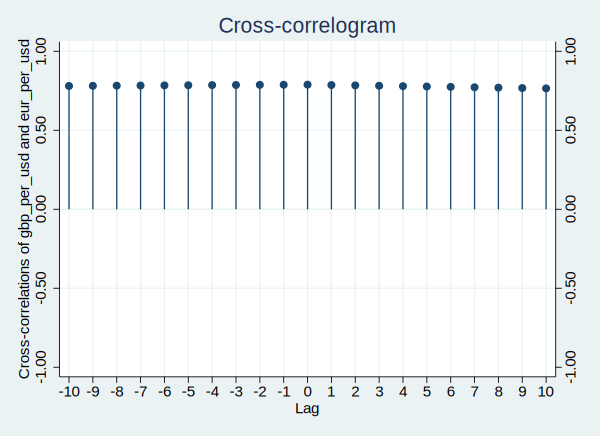

In [39]:
* Cross correlation # independent(gbp_per_usd) dependent (eur_per_usd)
xcorr gbp_per_usd eur_per_usd, lags(10) xlabel(-10(1)10,grid)


                 -1       0       1
 LAG      CORR   [Cross-correlation]
------------------------------------
-10      0.7804           |------  
-9       0.7814           |------  
-8       0.7823           |------  
-7       0.7832           |------  
-6       0.7842           |------  
-5       0.7851           |------  
-4       0.7859           |------  
-3       0.7867           |------  
-2       0.7874           |------  
-1       0.7881           |------  
0        0.7887           |------  
1        0.7864           |------  
2        0.7841           |------  
3        0.7818           |------  
4        0.7794           |------  
5        0.7771           |------  
6        0.7747           |------  
7        0.7723           |------  
8        0.7698           |------  
9        0.7674           |------  
10       0.7651           |------  


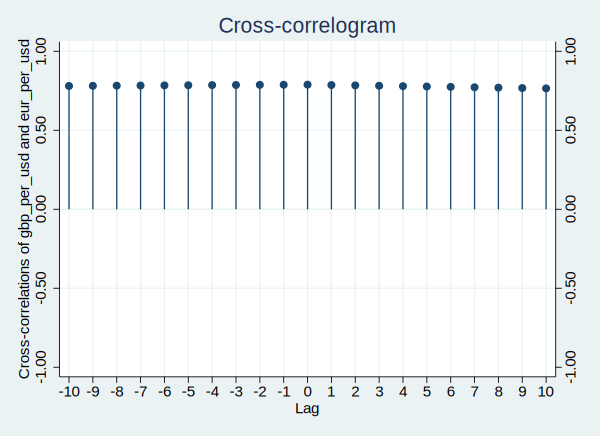

In [40]:
 * Showing strong co-movement
 xcorr gbp_per_usd eur_per_usd, lags(10) table

In [41]:
* Lag selection : Lag 1 is the best 
varsoc  gbp_per_usd eur_per_usd, maxlag(10)


   Selection-order criteria
   Sample:  11 - 2817                           Number of obs      =      2807
  +---------------------------------------------------------------------------+
  |lag |    LL      LR      df    p      FPE       AIC      HQIC      SBIC    |
  |----+----------------------------------------------------------------------|
  |  0 |  8051.41                      .000011  -5.73524  -5.73371  -5.73101  |
  |  1 |  22942.9   29783    4  0.000  2.7e-10* -16.3426*  -16.338* -16.3299* |
  |  2 |  22946.6  7.5149    4  0.111  2.7e-10  -16.3425  -16.3348  -16.3213  |
  |  3 |  22947.5   1.745    4  0.783  2.7e-10  -16.3402  -16.3295  -16.3106  |
  |  4 |  22947.8  .59484    4  0.964  2.8e-10  -16.3376  -16.3238  -16.2995  |
  |  5 |  22949.1  2.6429    4  0.619  2.8e-10  -16.3357  -16.3189  -16.2891  |
  |  6 |    22952  5.6496    4  0.227  2.8e-10  -16.3348   -16.315  -16.2798  |
  |  7 |  22954.4  4.9055    4  0.297  2.8e-10  -16.3337  -16.3108  -16.2703  |
  |  8 |  22

In [42]:
* unit-root test (h0 = unit-root): eur_per_usd
* Having a unit root : differentiation
dfuller eur_per_usd, lag(5)


Augmented Dickey-Fuller test for unit root         Number of obs   =      2811

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(t)             -1.388            -3.430            -2.860            -2.570
------------------------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.5880


In [46]:
* one-differentiation after eur_per_usd no unit-root
dfuller D1.eur_per_usd, lag(5)


Augmented Dickey-Fuller test for unit root         Number of obs   =      2810

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(t)            -22.035            -3.430            -2.860            -2.570
------------------------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.0000


In [43]:
* unit-root test (h0 = unit-root):  gbp_per_usd (unit-root)
dfuller gbp_per_usd, lag(5)


Augmented Dickey-Fuller test for unit root         Number of obs   =      2811

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(t)             -1.089            -3.430            -2.860            -2.570
------------------------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.7196


In [47]:
* unit-root test (h0 = unit-root):  gbp_per_usd (unit-root)
* After the first differentiation no unit root
dfuller d1.gbp_per_usd, lag(5)


Augmented Dickey-Fuller test for unit root         Number of obs   =      2810

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(t)            -21.816            -3.430            -2.860            -2.570
------------------------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.0000


In [50]:
* Testing for cointegration by using two-steps (H0: no cointegration ): no reject = VECM do not okay
* 1. Run an OLS
* 2. Get OLS residuals
* 3. Unit-root test
regress eur_per_usd gbp_per_usd 
predict e, resid               
dfuller e, lags(10)             



      Source |       SS           df       MS      Number of obs   =     2,817
-------------+----------------------------------   F(1, 2815)      =   4634.16
       Model |    10.73333         1    10.73333   Prob > F        =    0.0000
    Residual |  6.51991249     2,815  .002316132   R-squared       =    0.6221
-------------+----------------------------------   Adj R-squared   =    0.6220
       Total |  17.2532425     2,816  .006126862   Root MSE        =    .04813

------------------------------------------------------------------------------
 eur_per_usd |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 gbp_per_usd |   .8933362   .0131229    68.07   0.000     .8676047    .9190676
       _cons |   .2016043   .0090145    22.36   0.000     .1839286    .2192801
------------------------------------------------------------------------------



Augmented Dickey-Fuller test for unit root    

---
# Interpretation
---
* Two variable is feedback relationship with unitroot and without cointegration -> no VECM
* As a result, using VAR 
---

### Granger Causality by using VAR
---
* H0 var 1 do not granger cause var 2.
* Do not Granger-cause even after the first differentiation (VAR is not okay, do ARIMA)
---

In [52]:
quietly var eur_per_usd gbp_per_usd, lags(1/4)

In [53]:
vargranger


   Granger causality Wald tests
  +------------------------------------------------------------------+
  |          Equation           Excluded |   chi2     df Prob > chi2 |
  |--------------------------------------+---------------------------|
  |       eur_per_usd        gbp_per_usd |  1.4421     4    0.837    |
  |       eur_per_usd                ALL |  1.4421     4    0.837    |
  |--------------------------------------+---------------------------|
  |       gbp_per_usd        eur_per_usd |   4.037     4    0.401    |
  |       gbp_per_usd                ALL |   4.037     4    0.401    |
  +------------------------------------------------------------------+


In [54]:
quietly var D1.eur_per_usd D1.gbp_per_usd, lags(1/4)

In [55]:
vargranger


   Granger causality Wald tests
  +------------------------------------------------------------------+
  |          Equation           Excluded |   chi2     df Prob > chi2 |
  |--------------------------------------+---------------------------|
  |     D_eur_per_usd      D.gbp_per_usd |    3.84     4    0.428    |
  |     D_eur_per_usd                ALL |    3.84     4    0.428    |
  |--------------------------------------+---------------------------|
  |     D_gbp_per_usd      D.eur_per_usd |  2.0549     4    0.726    |
  |     D_gbp_per_usd                ALL |  2.0549     4    0.726    |
  +------------------------------------------------------------------+


In [56]:
* white noise Q test (H0:  no serial correlation ): AR(1) is okay it has white noisy
wntestq D1.eur_per_usd


Portmanteau test for white noise
---------------------------------------
 Portmanteau (Q) statistic =    35.7737
 Prob > chi2(40)           =     0.6609


In [57]:
* white noise Q test (H0:  no serial correlation ): AR(1) is not okay it has a serial correlaton
wntestq  D1.gbp_per_usd


Portmanteau test for white noise
---------------------------------------
 Portmanteau (Q) statistic =    71.6478
 Prob > chi2(40)           =     0.0016


In [58]:
regress D1.eur_per_usd  D1.gbp_per_usd


      Source |       SS           df       MS      Number of obs   =     2,816
-------------+----------------------------------   F(1, 2814)      =   1308.53
       Model |  .019856178         1  .019856178   Prob > F        =    0.0000
    Residual |  .042700801     2,814  .000015174   R-squared       =    0.3174
-------------+----------------------------------   Adj R-squared   =    0.3172
       Total |  .062556979     2,815  .000022223   Root MSE        =     .0039

------------------------------------------------------------------------------
D.           |
 eur_per_usd |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 gbp_per_usd |
         D1. |   .6145217   .0169881    36.17   0.000     .5812112    .6478321
             |
       _cons |   .0000444   .0000734     0.60   0.546    -.0000996    .0001883
------------------------------------------------------------------------------


In [59]:
* Durbin-Watson autocorrelation test (H0: no serial correlation)
estat durbinalt


Durbin's alternative test for autocorrelation
---------------------------------------------------------------------------
    lags(p)  |          chi2               df                 Prob > chi2
-------------+-------------------------------------------------------------
       1     |          0.089               1                   0.7652
---------------------------------------------------------------------------
                        H0: no serial correlation


In [60]:
* Breush-Godfrey autocorrelation test (H0: no serial correlation)
estat bgodfrey


Breusch-Godfrey LM test for autocorrelation
---------------------------------------------------------------------------
    lags(p)  |          chi2               df                 Prob > chi2
-------------+-------------------------------------------------------------
       1     |          0.089               1                   0.7650
---------------------------------------------------------------------------
                        H0: no serial correlation


---
### Cochrane-Orcutt regression: correcting for serial correlation
* No serial correlation : becomes stationary time series after 1st differentiation
* Fixing covariance matrix
---

In [62]:
* Cochrane-Orcutt regression:  Correcting for serial correlation
* no serial correlation : becomes stationary time series after 1st differentiation
prais D1.eur_per_usd  D1.gbp_per_usd, corc


Iteration 0:  rho = 0.0000
Iteration 1:  rho = 0.0056
Iteration 2:  rho = 0.0057
Iteration 3:  rho = 0.0057

Cochrane-Orcutt AR(1) regression -- iterated estimates

      Source |       SS           df       MS      Number of obs   =     2,815
-------------+----------------------------------   F(1, 2813)      =   1329.40
       Model |  .019953075         1  .019953075   Prob > F        =    0.0000
    Residual |  .042220617     2,813  .000015009   R-squared       =    0.3209
-------------+----------------------------------   Adj R-squared   =    0.3207
       Total |  .062173692     2,814  .000022094   Root MSE        =    .00387

------------------------------------------------------------------------------
D.           |
 eur_per_usd |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 gbp_per_usd |
         D1. |   .6162403   .0169014    36.46   0.000        .5831    .6493807
             

---
### ARIMA(1,1,1) for eur_per_usd, D1.eur_per_usd
* difference-stationary
* $ \Delta y_t = \gamma \Delta y_{t-1} + \varepsilon_t + \theta\varepsilon_{t-1} $

In [66]:
* no statistically signification for ar(1), ma(1) eur_per_usd
arima eur_per_usd, arima(1,1,1) nolog


ARIMA regression

Sample:  2 - 2817                               Number of obs     =       2816
                                                Wald chi2(2)      =       1.26
Log likelihood =  11090.88                      Prob > chi2       =     0.5338

------------------------------------------------------------------------------
D.           |                 OPG
 eur_per_usd |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
eur_per_usd  |
       _cons |   .0000702   .0000897     0.78   0.434    -.0001057    .0002461
-------------+----------------------------------------------------------------
ARMA         |
          ar |
         L1. |  -.4539405   1.017957    -0.45   0.656    -2.449099    1.541218
             |
          ma |
         L1. |   .4655642   1.011242     0.46   0.645    -1.516434    2.447562
-------------+----------------------------------------------------------------
 

In [67]:
* no statistically significant
arima D1.eur_per_usd, arima(1,1,1) nolog


ARIMA regression

Sample:  3 - 2817                               Number of obs     =       2815
                                                Wald chi2(2)      =       0.30
Log likelihood =  11082.34                      Prob > chi2       =     0.8623

------------------------------------------------------------------------------
D2.          |                 OPG
 eur_per_usd |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
eur_per_usd  |
       _cons |   5.46e-09   1.36e-07     0.04   0.968    -2.61e-07    2.72e-07
-------------+----------------------------------------------------------------
ARMA         |
          ar |
         L1. |   .0088623   .0163094     0.54   0.587    -.0231036    .0408281
             |
          ma |
         L1. |         -1   151.3215    -0.01   0.995    -297.5847    295.5847
-------------+----------------------------------------------------------------
 

In [69]:
arima eur_per_usd, ar(1 2 3) nolog


ARIMA regression

Sample:  1 - 2817                               Number of obs     =       2817
                                                Wald chi2(3)      =  843881.06
Log likelihood =  11092.83                      Prob > chi2       =     0.0000

------------------------------------------------------------------------------
             |                 OPG
 eur_per_usd |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
eur_per_usd  |
       _cons |   .8132886   .0430469    18.89   0.000     .7289183    .8976589
-------------+----------------------------------------------------------------
ARMA         |
          ar |
         L1. |   1.007981   .0160838    62.67   0.000     .9764575    1.039505
         L2. |  -.0232016   .0236198    -0.98   0.326    -.0694956    .0230923
         L3. |   .0135867   .0171497     0.79   0.428    -.0200261    .0471994
-------------+-----------------

---
### ARCH(1) test 
---
* D1.eur_per_usd have a ARCH
* H0: no ARCH effects
---

In [70]:
reg D1.eur_per_usd L.D1.eur_per_usd


      Source |       SS           df       MS      Number of obs   =     2,815
-------------+----------------------------------   F(1, 2813)      =      0.20
       Model |  4.4677e-06         1  4.4677e-06   Prob > F        =    0.6530
    Residual |  .062173206     2,813  .000022102   R-squared       =    0.0001
-------------+----------------------------------   Adj R-squared   =   -0.0003
       Total |  .062177673     2,814  .000022096   Root MSE        =     .0047

------------------------------------------------------------------------------
D.           |
 eur_per_usd |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 eur_per_usd |
         LD. |    .008454   .0188034     0.45   0.653    -.0284159    .0453239
             |
       _cons |   .0000627   .0000886     0.71   0.480    -.0001111    .0002364
------------------------------------------------------------------------------


In [72]:
estat archlm

LM test for autoregressive conditional heteroskedasticity (ARCH)
---------------------------------------------------------------------------
    lags(p)  |          chi2               df                 Prob > chi2
-------------+-------------------------------------------------------------
       1     |         18.198               1                   0.0000
---------------------------------------------------------------------------
         H0: no ARCH effects      vs.  H1: ARCH(p) disturbance


---
### AR(1), ARCH(1), GARCH(1)
---
* $ \Delta y_t = \alpha + \gamma \Delta y_{t-1} + \varepsilon_{t} $
* $ \sigma^{2}_{t} = w + \eta \varepsilon^{2}_{t-1} +\delta +\sigma^{2}_{t-1} $
* where $ \sigma^{2}_{t}$ requires w > 0 and $\eta > 0 $
* To be a stationary time series, it requires $\hat{\eta} + \hat{\delta} $ = 0.9963368  < 1 in the following example
* coefficient of arch lag of the firest differentiation of euro per usd is statistically significant and bigger than 0 as it should be 
---

In [73]:
arch D1.eur_per_usd, ar(1) arch(1) garch(1) nolog


ARCH family regression -- AR disturbances

Sample: 2 - 2817                                  Number of obs   =      2,816
Distribution: Gaussian                            Wald chi2(1)    =       0.55
Log likelihood =  11314.38                        Prob > chi2     =     0.4584

------------------------------------------------------------------------------
D.           |                 OPG
 eur_per_usd |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
eur_per_usd  |
       _cons |   .0000734   .0000757     0.97   0.332     -.000075    .0002218
-------------+----------------------------------------------------------------
ARMA         |
          ar |
         L1. |   .0152213   .0205286     0.74   0.458    -.0250139    .0554565
-------------+----------------------------------------------------------------
ARCH         |
        arch |
         L1. |   .0415039   .0042746     9.71   0.000  

---
### ARCH and GARCH The model assumes time invarying variance
* horizontal line of time invarying variance
---

In [75]:
* ARCH and GARCH The model assumes time invarying variance
arch D1.eur_per_usd, ar(1) nolog


Time-series regression -- AR disturbances

Sample: 2 - 2817                                  Number of obs   =      2,816
Distribution: Gaussian                            Wald chi2(1)    =       0.28
Log likelihood =  11090.74                        Prob > chi2     =     0.5985

------------------------------------------------------------------------------
D.           |                 OPG
 eur_per_usd |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
eur_per_usd  |
       _cons |   .0000702   .0000897     0.78   0.434    -.0001056     .000246
-------------+----------------------------------------------------------------
ARMA         |
          ar |
         L1. |   .0084491   .0160436     0.53   0.598    -.0229958     .039894
-------------+----------------------------------------------------------------
     /SIGMA2 |   .0000222   3.81e-07    58.31   0.000     .0000215     .000023
------

In [76]:
* one-step ahead condtional variance prediction
predict var1, variance 

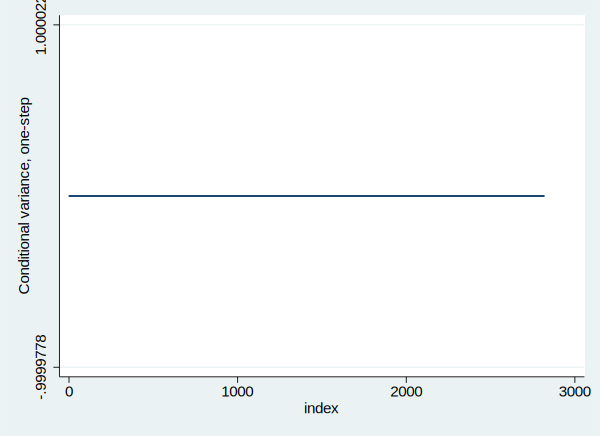

In [77]:
tsline var1

In [78]:
arch D1.eur_per_usd, ar(1) arch(1) nolog


ARCH family regression -- AR disturbances

Sample: 2 - 2817                                  Number of obs   =      2,816
Distribution: Gaussian                            Wald chi2(1)    =       0.07
Log likelihood =   11113.6                        Prob > chi2     =     0.7977

------------------------------------------------------------------------------
D.           |                 OPG
 eur_per_usd |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
eur_per_usd  |
       _cons |   .0000473   .0000848     0.56   0.577    -.0001189    .0002136
-------------+----------------------------------------------------------------
ARMA         |
          ar |
         L1. |   .0056138   .0218977     0.26   0.798    -.0373049    .0485326
-------------+----------------------------------------------------------------
ARCH         |
        arch |
         L1. |    .132639   .0177269     7.48   0.000  

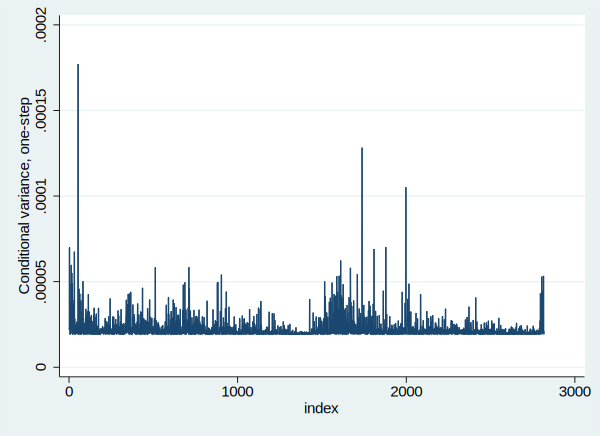

In [84]:
* time varying variance t+1 predicted 
predict var2, variance
tsline var2

In [79]:
capture drop ehat*

In [80]:
* ARCH variance prediction : one-ahead variance prediction
predict ehat, resid

(1 missing value generated)


In [81]:
* Squre residual
gen ehat2 = ehat^2

(1 missing value generated)


In [82]:
gen var2_pred = _b[ARCH:_cons] +  _b[ARCH:L1.arch]*L.ehat2

(2 missing values generated)


In [85]:
list var2* in 1/5


     +---------------------+
     | var2_p~d       var2 |
     |---------------------|
  1. |        .   .0000224 |
  2. |        .   .0000224 |
  3. | .0000698   .0000698 |
  4. | .0000259   .0000259 |
  5. | .0000488   .0000488 |
     +---------------------+


# Garch t_1 variance prediction 

In [88]:
qui arch D1.eur_per_usd, ar(1) arch(1) garch(1) nolog
predict var4, variance
capture drop ehat*
predict ehat, resid
gen ehat2 = ehat^2





(1 missing value generated)

(1 missing value generated)


In [93]:
gen var4_pred = .

(2,817 missing values generated)


In [102]:
forvalues i=3/2817 {
replace var4_pred =_b[ARCH:_cons] +  _b[ARCH:L1.arch]*L.ehat2 +  _b[ARCH:L1.garch]*L.var4 in 'i'
}


''' invalid observation number


r(198);
r(198);


In [90]:
list var4* in 1/5


     +----------+
     |     var4 |
     |----------|
  1. | .0000222 |
  2. | .0000222 |
  3. | .0000371 |
  4. | .0000374 |
  5. | .0000451 |
     +----------+


In [100]:
sum var4


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        var4 |      2,817    .0000224    .0000136   4.29e-06   .0000878
